In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
subj=27
space='electrodeSpace'
session=1
band='gamma'

In [48]:
prova=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(session)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
prova

array([0.7265625, 0.8515625, 0.7734375, 0.8046875, 0.7421875, 0.75     ,
       0.7578125, 0.796875 , 0.8125   , 0.75     ])

In [99]:
subjects=list(range(25,29)) 
bands=[-1,0,1,2] 
sessions=list(range(1,3))
space='electrodeSpace'
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 

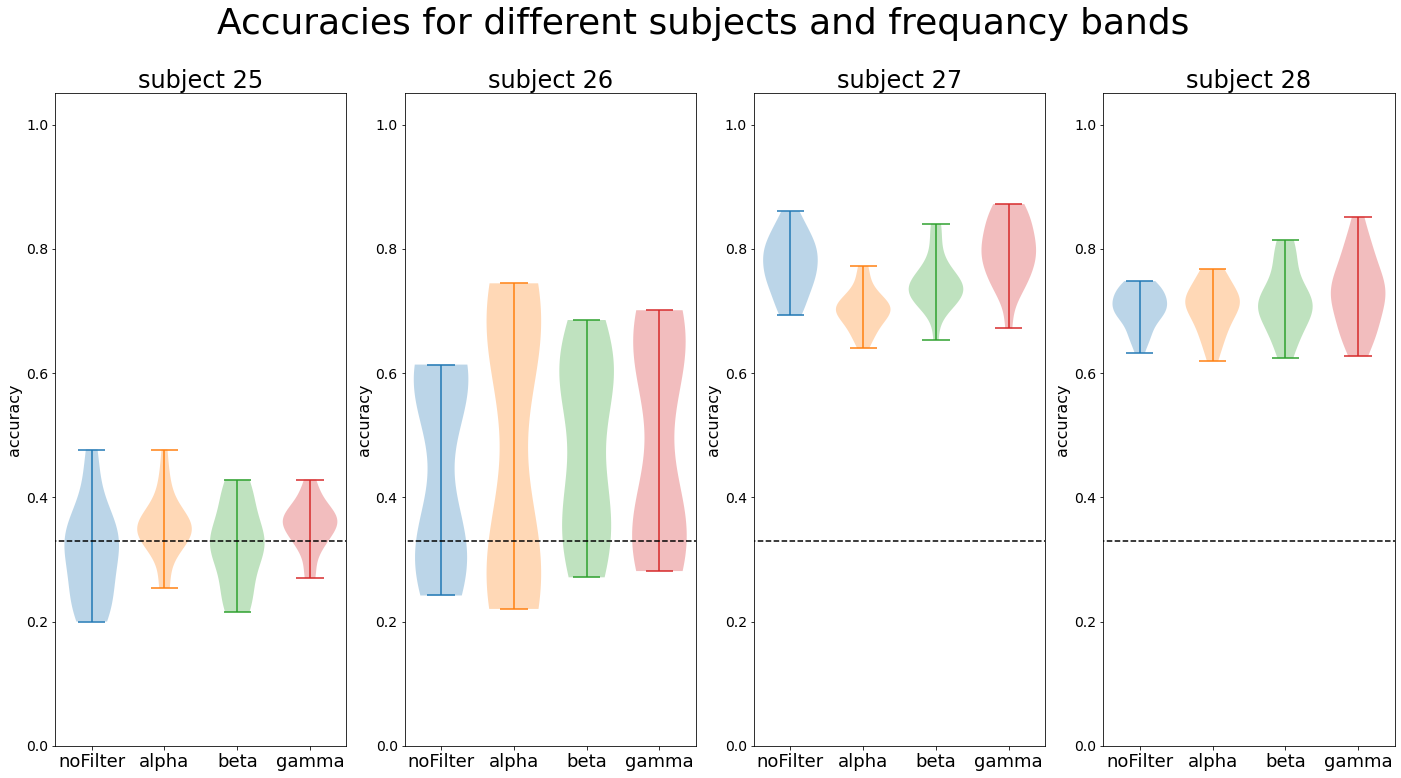

In [110]:

fig, axes = plt.subplots(nrows=1, ncols=len(subjects), figsize=(24, 12))
plt.rcParams['xtick.labelsize']=18
for subj in subjects:
    perf=np.zeros((4,2,10))
    i=0
    for b in bands:
        band=band_dic[b]
        temp1=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(1)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
        temp2=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(2)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
        if temp1.sum()==0:
            temp=temp2
        elif temp2.sum==0:
            temp=temp1
        else:
            temp=np.concatenate((temp1,temp2),axis=0)
        axes[subj-25].violinplot(temp,positions=[-0.6+i*0.4],widths=[0.3])
        i=i+1


    axes[subj-25].plot([-1,2],[0.33]*2,'--k')
    axes[subj-25].axis(xmin=-0.8,xmax=0.8,ymin=0,ymax=1.05)
    axes[subj-25].set_ylabel('accuracy',fontsize=16)
    axes[subj-25].set_title('subject '+str(subj),fontsize=24)
    
    plt.setp(axes,xticks=[-0.6,-0.2,0.2, 0.6],xticklabels=band_dic.values())
fig.suptitle('Accuracies for different subjects and frequancy bands',fontsize=36)
plt.show()
